### RNN, 스팸분류
- 데이터 : https://www.kaggle.com/team-ai/spam-text-message-classification

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("spam.csv")
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
data["label"] = data["Category"].map({"spam":1, "ham":0})
data.head()

,Category,Message,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [5]:
data['Message'].nunique(), data['label'].nunique() # 중복된 것이 있는지 확인

(5157, 2)

In [6]:
data.drop_duplicates(subset = ['Message'], inplace = True) # 중복 제외

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5157 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5157 non-null   object
 1   Message   5157 non-null   object
 2   label     5157 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 161.2+ KB


<function matplotlib.pyplot.show(close=None, block=None)>

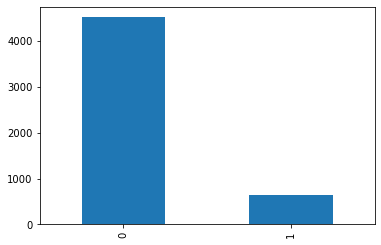

In [8]:
import matplotlib.pyplot as plt

data['label'].value_counts().plot(kind = 'bar')
plt.show

In [9]:
X_data = data["Message"]
y_data = data["label"]

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_data)  # X_data의 각 행에 토큰화

sequences = tokenizer.texts_to_sequences(X_data)  # 단어를 인덱스로 변환

In [11]:
print(sequences[0])

[46, 433, 4004, 776, 706, 658, 64, 8, 1200, 94, 121, 434, 1201, 143, 2708, 1202, 68, 56, 4005, 137]


In [12]:
word_index = tokenizer.word_index
print(word_index) # 단어와 인덱스 확인

{'i': 1, 'to': 2, 'you': 3, 'a': 4, 'the': 5, 'u': 6, 'and': 7, 'in': 8, 'is': 9, 'me': 10, 'my': 11, 'for': 12, 'your': 13, 'it': 14, 'of': 15, 'have': 16, 'that': 17, 'on': 18, 'call': 19, '2': 20, 'are': 21, 'now': 22, 'so': 23, 'but': 24, 'not': 25, 'at': 26, 'can': 27, 'or': 28, "i'm": 29, 'do': 30, 'be': 31, 'get': 32, 'will': 33, 'just': 34, 'if': 35, 'with': 36, 'we': 37, 'no': 38, 'ur': 39, 'this': 40, 'up': 41, 'gt': 42, 'lt': 43, '4': 44, 'how': 45, 'go': 46, 'when': 47, 'from': 48, 'ok': 49, 'out': 50, 'all': 51, 'what': 52, 'free': 53, 'know': 54, 'like': 55, 'got': 56, 'then': 57, 'good': 58, 'come': 59, 'am': 60, 'time': 61, 'was': 62, 'its': 63, 'only': 64, 'day': 65, 'love': 66, 'want': 67, 'there': 68, 'he': 69, 'text': 70, 'send': 71, 'ü': 72, 'going': 73, 'one': 74, 'need': 75, 'by': 76, 'lor': 77, 'home': 78, 'as': 79, 'about': 80, 'still': 81, 'see': 82, 'txt': 83, 'back': 84, 'r': 85, 'stop': 86, 'da': 87, 'k': 88, 'today': 89, "i'll": 90, 'dont': 91, 'our': 92, 

In [13]:
print(len(word_index))

9004


In [15]:
X_data = sequences
print("최대길이:", max(len(i) for i in X_data))
print("평균길이:", sum(map(len, X_data))/len(X_data))

최대길이: 189
평균길이: 15.680628272251308


In [16]:
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [17]:
vocab_size = len(word_index) + 1  # 단어의 수
max_len = 189 # 전체 데이터의 길이는 189로 맞춤

data = pad_sequences(X_data, maxlen = max_len)
print("data shape:", data.shape)

data shape: (5157, 189)


In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, y_data, test_size = 0.3, random_state = 103)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3609, 189) (1548, 189) (3609,) (1548,)


In [20]:
model = Sequential()
model.add(Embedding(vocab_size, 32)) # 임베딩 벡터의 차원은 32
model.add(SimpleRNN(32))# RNN 셀의 hidden_size는 32
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['acc'])
history = model.fit(x_train, y_train, epochs = 10, batch_size = 64, validation_split = 0.2)

Epoch 1/10
46/46 [==============================] - 6s 77ms/step - loss: 0.4788 - acc: 0.7915 - val_loss: 0.3621 - val_acc: 0.9474
Epoch 2/10
46/46 [==============================] - 3s 72ms/step - loss: 0.2282 - acc: 0.9647 - val_loss: 0.1601 - val_acc: 0.9640
Epoch 3/10
46/46 [==============================] - 3s 67ms/step - loss: 0.1187 - acc: 0.9661 - val_loss: 0.1045 - val_acc: 0.9737
Epoch 4/10
46/46 [==============================] - 3s 69ms/step - loss: 0.0617 - acc: 0.9827 - val_loss: 0.0884 - val_acc: 0.9723
Epoch 5/10
46/46 [==============================] - 3s 70ms/step - loss: 0.0377 - acc: 0.9906 - val_loss: 0.0764 - val_acc: 0.9709
Epoch 6/10
46/46 [==============================] - 3s 68ms/step - loss: 0.0276 - acc: 0.9934 - val_loss: 0.0902 - val_acc: 0.9681
Epoch 7/10
46/46 [==============================] - 3s 64ms/step - loss: 0.0197 - acc: 0.9945 - val_loss: 0.0568 - val_acc: 0.9848
Epoch 8/10
46/46 [==============================] - 3s 66ms/step - loss: 0.0112 - a

In [21]:
model.evaluate(x_test, y_test)

49/49 [==============================] - 1s 14ms/step - loss: 0.0717 - acc: 0.9787


[0.07174916565418243, 0.9786821603775024]

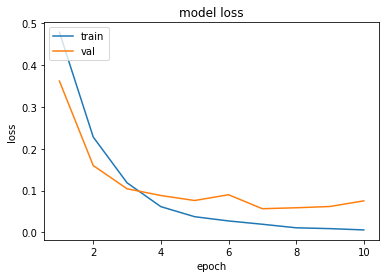

In [22]:
# 시각화
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()